Data Preparation

Load data: Google Stock Price

In [ ]:
# load data
from google.colab import files
uploaded = files.upload()

import pandas as pd
trainset = pd.read_csv('Google_Stock_Price_Train.csv')
testset = pd.read_csv('Google_Stock_Price_Test.csv')

print(trainset.head())
print(testset.head())

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv
Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


In [ ]:
# check the raw data
# train set
trainset.info()
trainset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [ ]:
# test set
testset.info()
testset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


Data pre-processing


1. Data cleaning: Open, High, Low, Close, Volume

In [ ]:
# remove the comma from the 'Volume' column and convert from Object to float data type in train and test sets
trainset['Volume'] = trainset['Volume'].str.replace(',', '').astype(float)
testset['Volume'] = testset['Volume'].str.replace(',', '').astype(float)

# convert the "Close" column

trainset['Close'] = trainset['Close'].str.replace(',', '').astype(float)

In [ ]:
# check if the commas have been removed.
print(trainset.head())
print(testset.head())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7380500.0
1  1/4/2012  331.27  333.87  329.08  666.45   5749400.0
2  1/5/2012  329.83  330.75  326.89  657.21   6590300.0
3  1/6/2012  328.34  328.77  323.68  648.24   5405900.0
4  1/9/2012  322.04  322.29  309.46  620.76  11688800.0
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1657300.0
1  1/4/2017  788.36  791.34  783.16  786.90  1073000.0
2  1/5/2017  786.08  794.48  785.02  794.02  1335200.0
3  1/6/2017  795.26  807.90  792.20  806.15  1640200.0
4  1/9/2017  806.40  809.97  802.83  806.65  1272400.0


In [ ]:
# check if the datatype has been converted
trainset.info()
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


1. Data cleaning: Date

In [ ]:
# transfer to datetime format
trainset['Date'] = pd.to_datetime(trainset['Date'])
testset['Date'] = pd.to_datetime(testset['Date'])

trainset.set_index('Date', inplace=True)
testset.set_index('Date', inplace=True)

print(trainset.head())
print(testset.head())

              Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7380500.0
2012-01-04  331.27  333.87  329.08  666.45   5749400.0
2012-01-05  329.83  330.75  326.89  657.21   6590300.0
2012-01-06  328.34  328.77  323.68  648.24   5405900.0
2012-01-09  322.04  322.29  309.46  620.76  11688800.0
              Open    High     Low   Close     Volume
Date                                                 
2017-01-03  778.81  789.63  775.80  786.14  1657300.0
2017-01-04  788.36  791.34  783.16  786.90  1073000.0
2017-01-05  786.08  794.48  785.02  794.02  1335200.0
2017-01-06  795.26  807.90  792.20  806.15  1640200.0
2017-01-09  806.40  809.97  802.83  806.65  1272400.0


2. Data Visualization

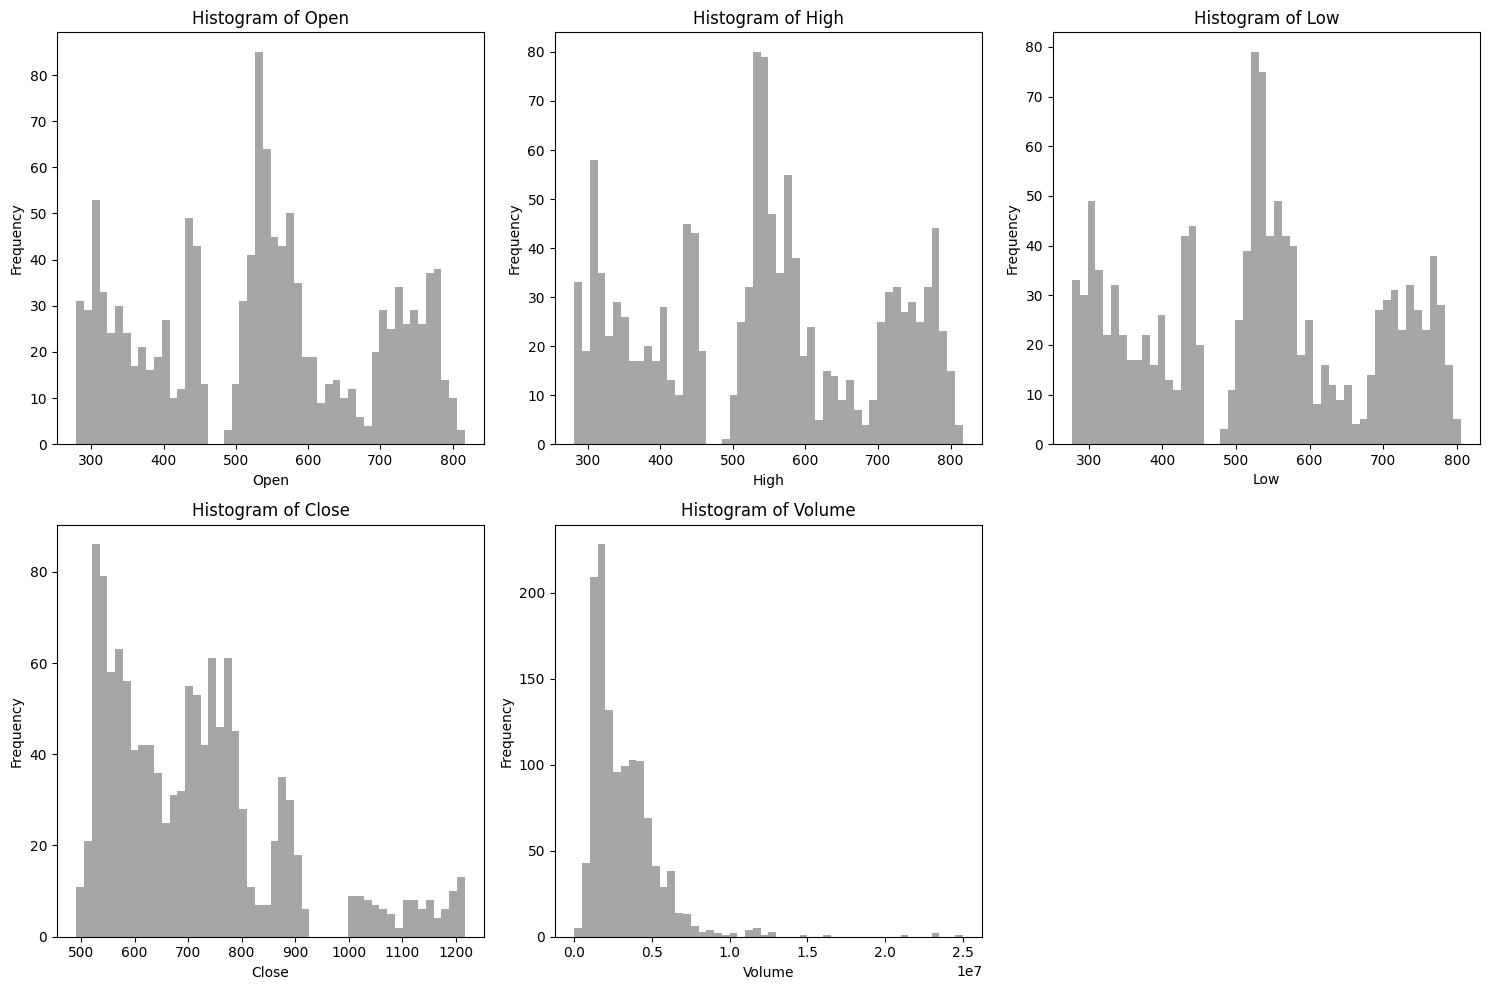

In [ ]:
# visualize the features 'Open', 'High', 'Low', 'Close', 'Volume'
import matplotlib.pyplot as plt

features = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(features):
    ax = axes[i // 3, i % 3]
    ax.hist(trainset[col], bins=50, color='gray', alpha=0.7)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


3. Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# set up the target
target = 'Close'

# training set weight 80%, validation set weight 20%
train_features, val_features, train_labels, val_labels = train_test_split(
    trainset[features], trainset[target], test_size=0.2, random_state=42
)

test_features = testset[features].copy() # to ensure the data correctly appying
test_labels = testset[target].copy()


print("train features shape:", train_features.shape)
print("train labels shape:", train_labels.shape)
print("validation features shape:", val_features.shape)
print("validation labels shape:", val_labels.shape)
print("test features shape:", test_features.shape)
print("test labels shape:", test_labels.shape)


train features shape: (1006, 5)
train labels shape: (1006,)
validation features shape: (252, 5)
validation labels shape: (252,)
test features shape: (20, 5)
test labels shape: (20,)


4. Data Normalization

Based on the original train set histograms, we can see the distributions of 'Open', 'High', 'Low', 'Close' are multimodal distributions.
So we can apply Min-Max Normalization to 'Open', 'High', 'Low', 'Close' columns.




In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train_features = scaler.fit_transform(train_features)

scaled_val_features = scaler.transform(val_features)
scaled_test_features = scaler.transform(test_features)


print("scaled train features shape:", scaled_train_features.shape)
print("scaled validation features  shape:", scaled_val_features.shape)
print("scaled test features  shape:", scaled_test_features.shape)


scaled train features shape: (1006, 5)
scaled validation features  shape: (252, 5)
scaled test features  shape: (20, 5)


Define time series function create_sequences and set up the predicting days is 30 (time_steps = 30)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [ ]:
train_params = {"batch_size": 32,
              "epochs": 1000,
              "lr": 0.1,
              "time_steps": 12,
              "forecast_steps": 6,
              "window": 12,
              "rnn_size": 128,
              "FC_size": 32,
              "optim": Adam,
              "dropout": 0.5,
              "earlystop": {"patience": 20,
                            "min_delta": 0.00001},
              "reduce_lr": {"factor": 0.1,
                            "patience": 10,
                            "min_delta": 0.0001}
              }

Building Models: Vanilla RNN, LSTM, GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [ ]:

def rmse(true_y, pred_y):
    return tf.sqrt(tf.reduce_mean(tf.square(true_y - pred_y)))

def mda(true_y, pred_y):
    direction_true = tf.sign(true_y[1:] - true_y[:-1])
    direction_pred = tf.sign(pred_y[1:] - pred_y[true_y    return tf.reduce_mean(tf.cast(tf.equal(direction_true, direction_pred), tf.float32))


1. Build up models: Vanilla RNN, LSTM, GRU

In [ ]:
from tensorflow.keras import Model, Input

def build_vanilla_rnn(input_shape, parameters):
    inputs = Input(batch_shape=(parameters['batch_size'],) + input_shape)
    x = SimpleRNN(units=parameters['rnn_size'],
                  unroll=True,
                  stateful=True)(inputs)
    x = Dropout(parameters['dropout'])(x)
    x = Dense(parameters['FC_size'], activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = parameters["optim"](learning_rate=parameters["lr"])
    model.compile(loss='mse', optimizer=optimizer, metrics=[rmse, mda])
    return model

def build_GRU(input_shape, parameters):
    inputs = Input(batch_shape=(parameters['batch_size'],) + input_shape)
    x = GRU(units=parameters['rnn_size'],
            unroll=True,
            stateful=True)(inputs)
    x = Dropout(parameters['dropout'])(x)
    x = Dense(parameters['FC_size'], activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = parameters["optim"](learning_rate=parameters["lr"])
    model.compile(loss='mse', optimizer=optimizer, metrics=[rmse, mda])
    return model

def build_LSTM(input_shape, parameters):
    inputs = Input(batch_shape=(parameters['batch_size'],) + input_shape)
    x = LSTM(units=parameters['rnn_size'],
             unroll=True,
             stateful=True)(inputs)
    x = Dropout(parameters['dropout'])(x)
    x = Dense(parameters['FC_size'], activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = parameters["optim"](learning_rate=parameters["lr"])
    model.compile(loss='mse', optimizer=optimizer, metrics=[rmse, mda])
    return model


2. Early Stopping setting

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=train_params["earlystop"]["patience"],
    min_delta=train_params["earlystop"]["min_delta"],
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=train_params["reduce_lr"]["factor"],
    patience=train_params["reduce_lr"]["patience"],
    min_delta=train_params["reduce_lr"]["min_delta"]
)


In [ ]:
scaled_train_features = scaled_train_features.values if hasattr(scaled_train_features, 'values') else scaled_train_features
train_labels = train_labels.values if hasattr(train_labels, 'values') else train_labels

scaled_val_features = scaled_val_features.values if hasattr(scaled_val_features, 'values') else scaled_val_features
val_labels = val_labels.values if hasattr(val_labels, 'values') else val_labels

scaled_test_features = scaled_test_features.values if hasattr(scaled_test_features, 'values') else scaled_test_features
test_labels = test_labels.values if hasattr(test_labels, 'values') else test_labels


In [ ]:
train_labels = train_labels.reset_index(drop=True) if hasattr(train_labels, 'reset_index') else train_labels
val_labels = val_labels.reset_index(drop=True) if hasattr(val_labels, 'reset_index') else val_labels
test_labels = test_labels.reset_index(drop=True) if hasattr(test_labels, 'reset_index') else test_labels


In [ ]:
def create_sequences(data, target, time_steps=30):

    X, y = [], []
    for i in range(time_steps, min(len(data), len(target))):
        X.append(data[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)


In [ ]:

time_steps = train_params["time_steps"]


train_X, train_y = create_sequences(scaled_train_features, train_labels, time_steps)
val_X, val_y = create_sequences(scaled_val_features, val_labels, time_steps)
test_X, test_y = create_sequences(scaled_test_features, test_labels, time_steps)


print(f"train_X shape: {train_X.shape}, train_y shape: {train_y.shape}")
print(f"val_X shape: {val_X.shape}, val_y shape: {val_y.shape}")
print(f"test_X shape: {test_X.shape}, test_y shape: {test_y.shape}")

X_train shape: (994, 12, 5), y_train shape: (994,)
X_val shape: (240, 12, 5), y_val shape: (240,)
X_test shape: (8, 12, 5), y_test shape: (8,)


In [ ]:

batch_size = train_params["batch_size"]
train_size = (len(train_X) // batch_size) * batch_size
val_size = (len(val_X) // batch_size) * batch_size

train_X, train_y = train_X[:train_size], train_y[:train_size]
val_X, val_y = val_X[:val_size], val_y[:val_size]


3. Training models

In [ ]:

input_shape = (train_params["time_steps"], train_X.shape[2])

models = {
    "Vanilla RNN": build_vanilla_rnn(input_shape, train_params),
    "GRU": build_GRU(input_shape, train_params),
    "LSTM": build_LSTM(input_shape, train_params)
}

results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(
        train_X, train_y,
        validation_data=(val_X, val_y),
        batch_size=train_params["batch_size"],
        epochs=train_params["epochs"],
        verbose=1,
        callbacks=[early_stopping, reduce_lr]
    )
    predictions = model.predict(val_X)
    mse = mean_squared_error(val_y, predictions)
    rmse_val = np.sqrt(mse)
    results.append({"Model": model_name, "MSE": mse, "RMSE": rmse_val})


Training Vanilla RNN...
Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 300853.5625 - mda: 0.4977 - rmse: 502.1104 - val_loss: 29845.9902 - val_mda: 0.0326 - val_rmse: 172.1291 - learning_rate: 0.1000
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 36107.5078 - mda: 0.4999 - rmse: 189.8289 - val_loss: 30717.8438 - val_mda: 0.0000e+00 - val_rmse: 174.4217 - learning_rate: 0.1000
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34198.9492 - mda: 0.4992 - rmse: 184.1666 - val_loss: 31621.6934 - val_mda: 0.0000e+00 - val_rmse: 176.9493 - learning_rate: 0.1000
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34443.6055 - mda: 0.4993 - rmse: 181.7782 - val_loss: 30291.6055 - val_mda: 0.0000e+00 - val_rmse: 173.2201 - learning_rate: 0.1000
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31172.1680 - mda: 0.4993 - rmse: 173.1435 - val_loss: 29185.1094 - val_mda: 0.0000e+00 - val_rmse: 170.1697 - learning_rate: 0.1000
Epoch 6/1000
31/31

4. Evaluating and result

In [ ]:

results_df = pd.DataFrame(results)
print(results_df)


         Model           MSE        RMSE
0  Vanilla RNN  28999.006823  170.290948
1          GRU  29659.765464  172.220108
2         LSTM  28993.808068  170.275683


Training Vanilla RNN...
Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32728.4863 - mda: 0.5007 - rmse: 176.0543 - val_loss: 29132.4727 - val_mda: 0.0184 - val_rmse: 169.9396 - learning_rate: 1.0000e-03
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28931.9160 - mda: 0.4972 - rmse: 168.9413 - val_loss: 29207.7812 - val_mda: 0.0000e+00 - val_rmse: 170.1507 - learning_rate: 1.0000e-03
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30521.0508 - mda: 0.4983 - rmse: 173.5587 - val_loss: 29330.1152 - val_mda: 0.0000e+00 - val_rmse: 170.4958 - learning_rate: 1.0000e-03
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32694.9277 - mda: 0.4990 - rmse: 173.6093 - val_loss: 29259.4199 - val_mda: 0.0000e+00 - val_rmse: 170.2961 - learning_rate: 1.0000e-03
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30332.3379 - mda: 0.5014 - rmse: 173.9149 - val_loss: 29206.1543 - val_mda: 0.0000e+00 - val_rmse: 170.1461 - learning_rate: 1.0000e-03


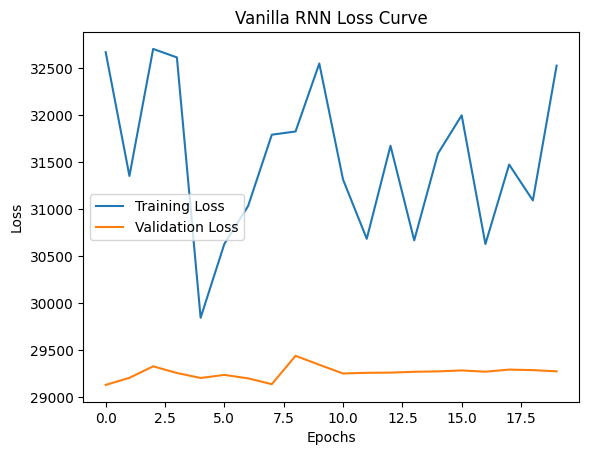

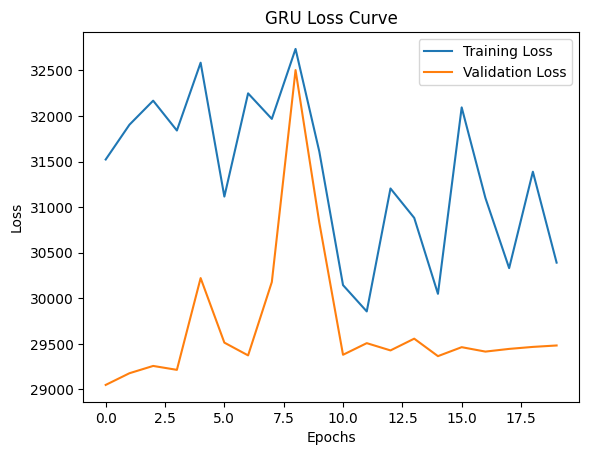

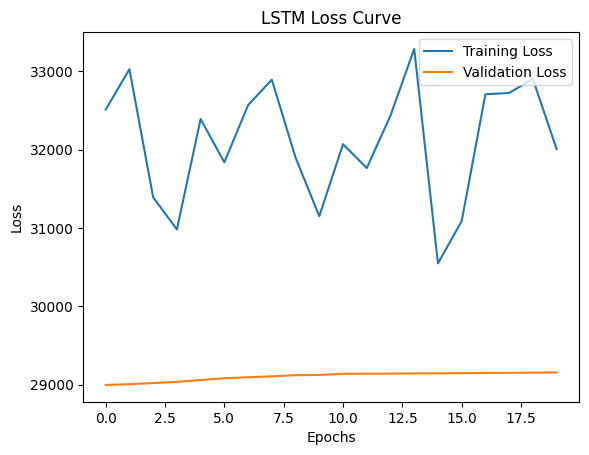

In [ ]:
import matplotlib.pyplot as plt


histories = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(
        train_X, train_y,
        validation_data=(val_X, val_y),
        batch_size=train_params["batch_size"],
        epochs=train_params["epochs"],
        verbose=1,
        callbacks=[early_stopping, reduce_lr]
    )
    histories[model_name] = history


def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss Curve")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


for model_name, history in histories.items():
    plot_loss(history, model_name)


In [ ]:
for model_name, history in histories.items():
    print(f"{model_name} history keys: {history.history.keys()}")


Vanilla RNN history keys: dict_keys(['loss', 'mda', 'rmse', 'val_loss', 'val_mda', 'val_rmse', 'learning_rate'])
GRU history keys: dict_keys(['loss', 'mda', 'rmse', 'val_loss', 'val_mda', 'val_rmse', 'learning_rate'])
LSTM history keys: dict_keys(['loss', 'mda', 'rmse', 'val_loss', 'val_mda', 'val_rmse', 'learning_rate'])


I doubt the result above. So I want to do different parameters combinations.

In [ ]:
from itertools import product
import tensorflow as tf


param_grid = {
    "batch_size": [16, 32],
    "epochs": [20, 50],
    "lr": [0.1, 0.01],
    "time_steps": [6, 12],
    "rnn_size": [128],
    "FC_size": [32],
    "dropout": [0.5]
}


param_combinations = list(product(
    param_grid["batch_size"],
    param_grid["epochs"],
    param_grid["lr"],
    param_grid["time_steps"],
    param_grid["rnn_size"],
    param_grid["FC_size"],
    param_grid["dropout"]
))


In [ ]:
def build_vanilla_rnn(input_shape, params):
    model = Sequential([
        SimpleRNN(units=params['rnn_size'],
                  unroll=True,
                  stateful=False,
                  input_shape=input_shape),
                  Dropout(params['dropout']),
                  Dense(params['FC_size'], activation='relu'),
                  Dense(1)
    ])
    optimizer = Adam(learning_rate=params['lr'])
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

def build_GRU(input_shape, params):
    model = Sequential([
        SimpleRNN(units=params['rnn_size'],
                  unroll=True,
                  stateful=False,
                  input_shape=input_shape),
        Dropout(params['dropout']),
        Dense(params['FC_size'], activation='relu'),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=params['lr'])
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

def build_LSTM(input_shape, params):
    model = Sequential([
        SimpleRNN(units=params['rnn_size'],
                  unroll=True,
                  stateful=False,
                  input_shape=input_shape),
        Dropout(params['dropout']),
        Dense(params['FC_size'], activation='relu'),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=params['lr'])
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

Finding best parameters for 3 models


In [ ]:

model_builders = {
    "Vanilla RNN": build_vanilla_rnn,
    "GRU": build_GRU,
    "LSTM": build_LSTM
}

model_types = list(model_builders.keys())

param_combinations = list(product(
    model_types,
    param_grid["batch_size"],
    param_grid["epochs"],
    param_grid["lr"],
    param_grid["time_steps"],
    param_grid["rnn_size"],
    param_grid["FC_size"],
    param_grid["dropout"]
))

results = []
best_params = None
best_val_loss = float('inf')

for i, params in enumerate(param_combinations):
    print(f"Testing combination {i+1}/{len(param_combinations)}...")


    current_model_type = params[0]
    current_params = {
        "batch_size": params[1],
        "epochs": params[2],
        "lr": params[3],
        "time_steps": params[4],
        "rnn_size": params[5],
        "FC_size": params[6],
        "dropout": params[7]
    }


    time_steps = current_params["time_steps"]
    train_X_seq, train_y_seq = create_sequences(scaled_train_features, train_labels, time_steps)
    val_X_seq, val_y_seq = create_sequences(scaled_val_features, val_labels, time_steps)

    # build up models
    input_shape = (time_steps, train_X_seq.shape[2])
    model_builder = model_builders[current_model_type]
    model = model_builder(input_shape, current_params)

    # train the models
    history = model.fit(
        train_X_seq, train_y_seq,
        validation_data=(val_X_seq, val_y_seq),
        batch_size=current_params["batch_size"],
        epochs=current_params["epochs"],
        verbose=0
    )

    # record the result
    val_loss = min(history.history['val_loss'])
    results.append({
        "model_type": current_model_type,
        "params": current_params,
        "val_loss": val_loss
    })

    # update the best parameters
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_params = {"model_type": current_model_type, "params": current_params}


results = sorted(results, key=lambda x: x['val_loss'])

print(f"Best model type and parameters: {best_params}")
print(f"Best validation loss: {best_val_loss}")


Testing combination 1/48...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Testing combination 2/48...
Testing combination 3/48...
Testing combination 4/48...
Testing combination 5/48...
Testing combination 6/48...
Testing combination 7/48...
Testing combination 8/48...
Testing combination 9/48...
Testing combination 10/48...
Testing combination 11/48...
Testing combination 12/48...
Testing combination 13/48...
Testing combination 14/48...
Testing combination 15/48...
Testing combination 16/48...
Testing combination 17/48...
Testing combination 18/48...
Testing combination 19/48...
Testing combination 20/48...
Testing combination 21/48...
Testing combination 22/48...
Testing combination 23/48...
Testing combination 24/48...
Testing combination 25/48...
Testing combination 26/48...
Testing combination 27/48...
Testing combination 28/48...
Testing combination 29/48...
Testing combination 30/48...
Testing combination 31/48...
Testing combination 32/48...
Testing combination 33/48...
Testing combination 34/48...
Testing combination 35/48...
Testing combination 36

Trend plot

In [ ]:
pred_y = model.predict(test_X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


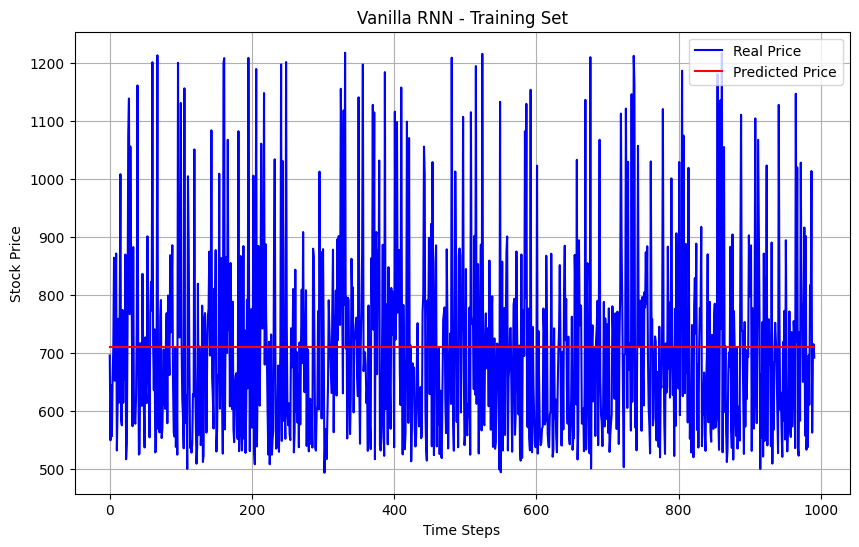

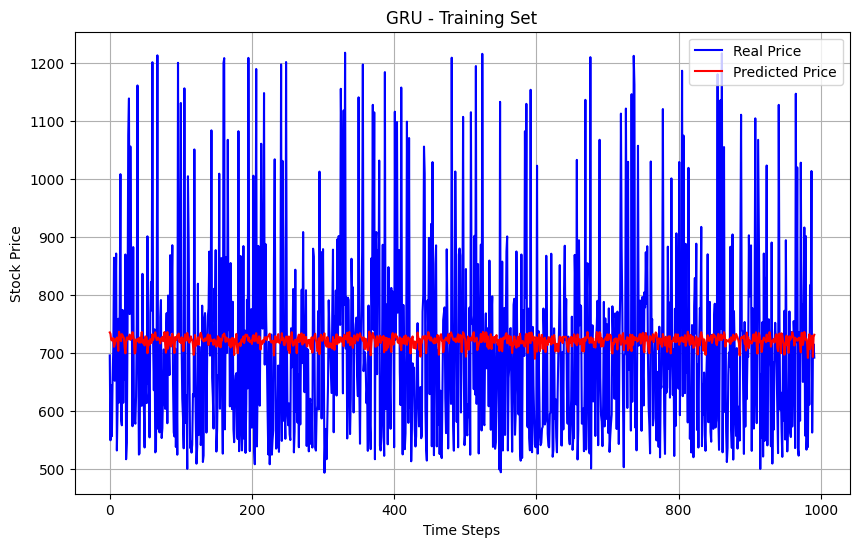

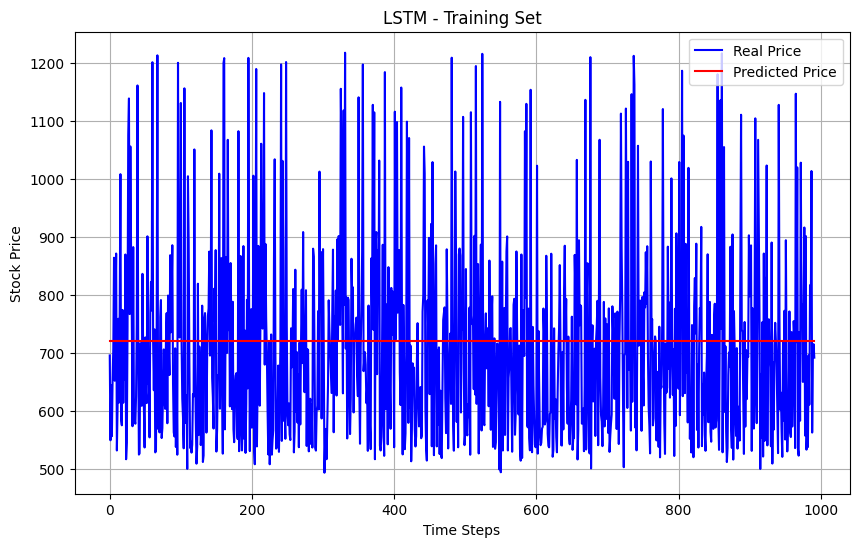

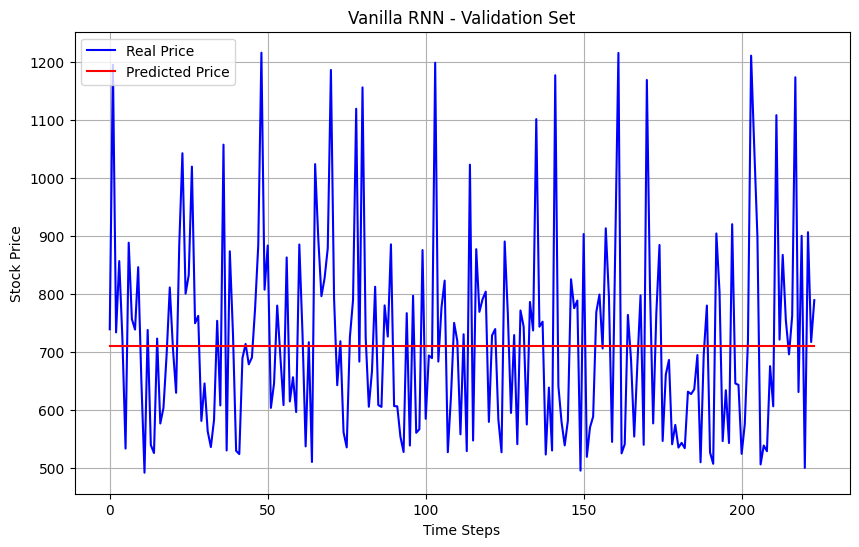

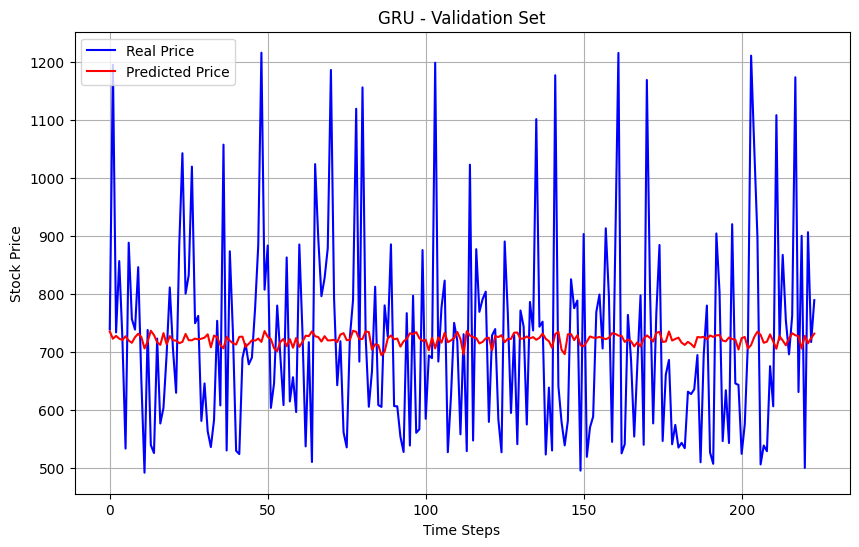

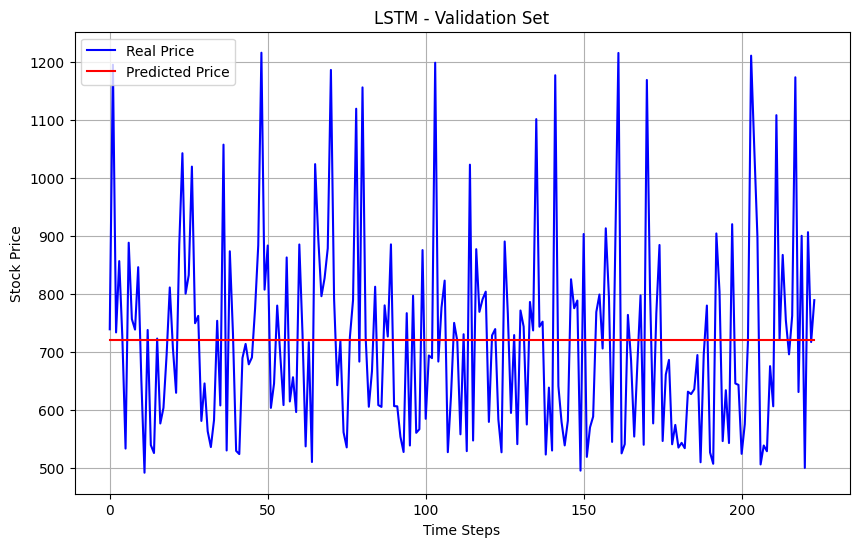

In [ ]:
import matplotlib.pyplot as plt

def plot_trend(true_y, pred_y, title):
    """
    :param y_true: true value
    :param pred_y: predicted value
    :param title
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Real Price', color='blue')
    plt.plot(pred_y, label='Predicted Price', color='red')
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid()
    plt.show()


predictions_train_rnn = models["Vanilla RNN"].predict(train_X)
predictions_val_rnn = models["Vanilla RNN"].predict(val_X)

predictions_train_gru = models["GRU"].predict(train_X)
predictions_val_gru = models["GRU"].predict(val_X)

predictions_train_lstm = models["LSTM"].predict(train_X)
predictions_val_lstm = models["LSTM"].predict(val_X)


plot_trend(train_y, predictions_train_rnn, "Vanilla RNN - Training Set")
plot_trend(train_y, predictions_train_gru, "GRU - Training Set")
plot_trend(train_y, predictions_train_lstm, "LSTM - Training Set")


plot_trend(val_y, predictions_val_rnn, "Vanilla RNN - Validation Set")
plot_trend(val_y, predictions_val_gru, "GRU - Validation Set")
plot_trend(val_y, predictions_val_lstm, "LSTM - Validation Set")


Trend plot by using test set.

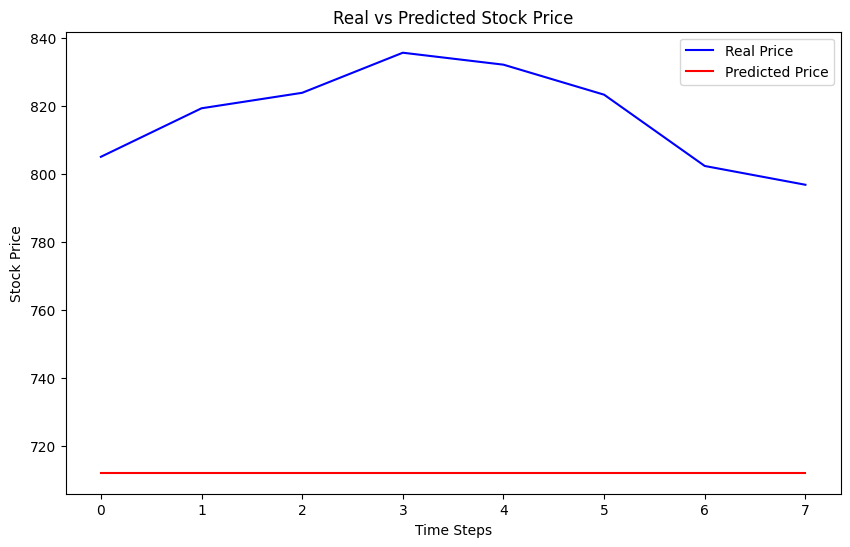

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_y, label="Real Price", color="blue")
plt.plot(pred_y, label="Predicted Price", color="red")
plt.title("Real vs Predicted Stock Price")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
